In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sealevels = pd.read_csv('epa-sea-level.csv')
sealevels.drop(['Lower Error Bound', 'Upper Error Bound', 'NOAA Adjusted Sea Level'], axis='columns', inplace=True)
sealevels.rename({'CSIRO Adjusted Sea Level': 'sea-level'}, axis='columns', inplace=True)

In [14]:
sealevels

,Year,sea-level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551
...,...,...
129,2009,8.586614
130,2010,8.901575
131,2011,8.964567
132,2012,9.326772


<AxesSubplot:xlabel='Year', ylabel='sea-level'>

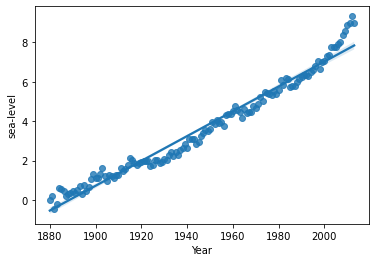

In [16]:
sns.regplot(data=sealevels, x='Year', y='sea-level')

In [17]:
X = sealevels.Year.values.reshape(-1,1)
y = sealevels['sea-level'].values.reshape(-1,1)

model = LinearRegression().fit(X,y)

model.score(X,y)

0.9697466074149553

In [28]:
y2070 = model.predict([[2070]])
y2070[0][0]

11.436346937379255

In [21]:
sealevels.loc[sealevels['Year'] == 2013, ('sea-level')]

133    8.980315
Name: sea-level, dtype: float64

In [27]:
rise_2070 = (model.predict([[2070]])[0][0]) - sealevels.loc[sealevels['Year'] == 2013, ('sea-level')]
rise_2100 = (model.predict([[2100]])[0][0]) - sealevels.loc[sealevels['Year'] == 2013, ('sea-level')]
rise_2100

133    4.34737
Name: sea-level, dtype: float64